# Micro Credit Defaulter Project

### Data description

The data is about a client in telecom industry who is collaborating with an Microfinance Institution (MFI)  to provide micro-credit on mobile balances to be paid back in 5 days. They are focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). <br>
i.e, the interest rate on the loan is 20%

### Conventions

* The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days.
* The Consumer is believed to be a non defaulter if the loaned amount is paid within the time duration of 5 days.
* Defaulters are labelled as '0'
* Non-defaulters are labelled as '1'

### Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\MicroCredit_DataFile.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


The above shown are the first 5 rows of the dataset

In [4]:
df.shape

(209593, 37)

The dataset has 209593 rows and 37 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

#### Some more points we know about the data.

• There are no null values in the dataset. <br> • There may be some customers with no loan history. <br>•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.<br> •	For some features, there may be values which might not be realistic.<br>Data is expensive and we cannot lose more than 7-8% of the data.

In [6]:
data_dtypes=pd.DataFrame(df.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['CreditStatNew', 'dtype']
data_dtypes['first value'] = df.loc[0].values

In [7]:
data_dtypes.head(37)

,CreditStatNew,dtype,first value
0,Unnamed: 0,int64,1
1,label,int64,0
2,msisdn,object,21408I70789
3,aon,float64,272
4,daily_decr30,float64,3055.05
5,daily_decr90,float64,3065.15
6,rental30,float64,220.13
7,rental90,float64,260.13
8,last_rech_date_ma,float64,2
9,last_rech_date_da,float64,0


In [8]:
data_y=df['cnt_loans30']

In [9]:
data_y.unique()

array([ 2,  1,  7,  3,  4,  5,  8,  6, 10, 12,  0, 11,  9, 21, 17, 15, 19,
       13, 18, 25, 22, 20, 16, 14, 28, 29, 23, 33, 30, 26, 36, 31, 27, 24,
       32, 38, 41, 44, 50, 35], dtype=int64)

In [10]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


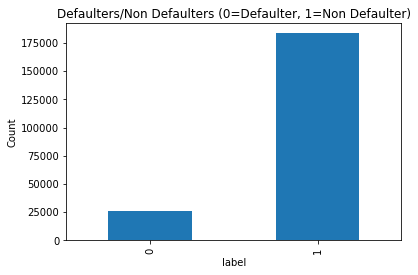

In [11]:
pd.Series(df['label']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("label")
plt.title('Defaulters/Non Defaulters (0=Defaulter, 1=Non Defaulter)');

The dataset is imbalanced. Label ‘1’ has more than 1,75,000 records, while, label ‘0’ has approximately 25,000 records.

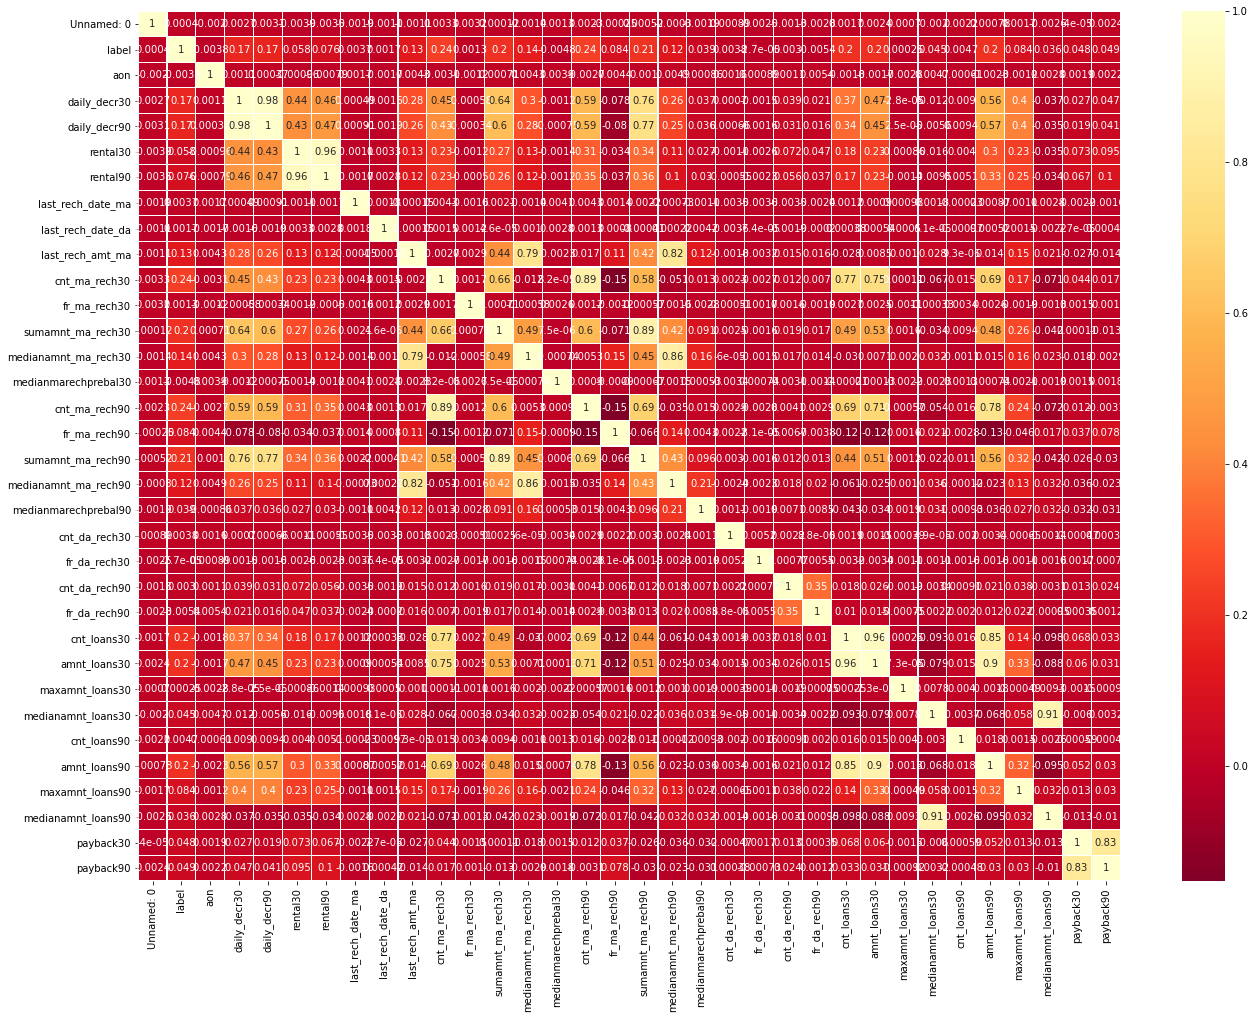

In [12]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlOrRd_r", annot=True)
plt.yticks(rotation=0);

<AxesSubplot:xlabel='cnt_loans30'>

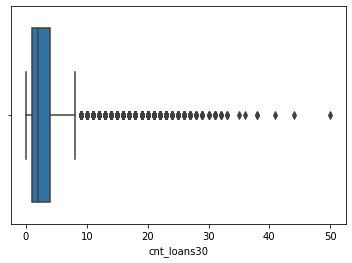

In [13]:
sns.boxplot(x='cnt_loans30',hue='payback30',data=df)

<AxesSubplot:xlabel='cnt_loans90'>

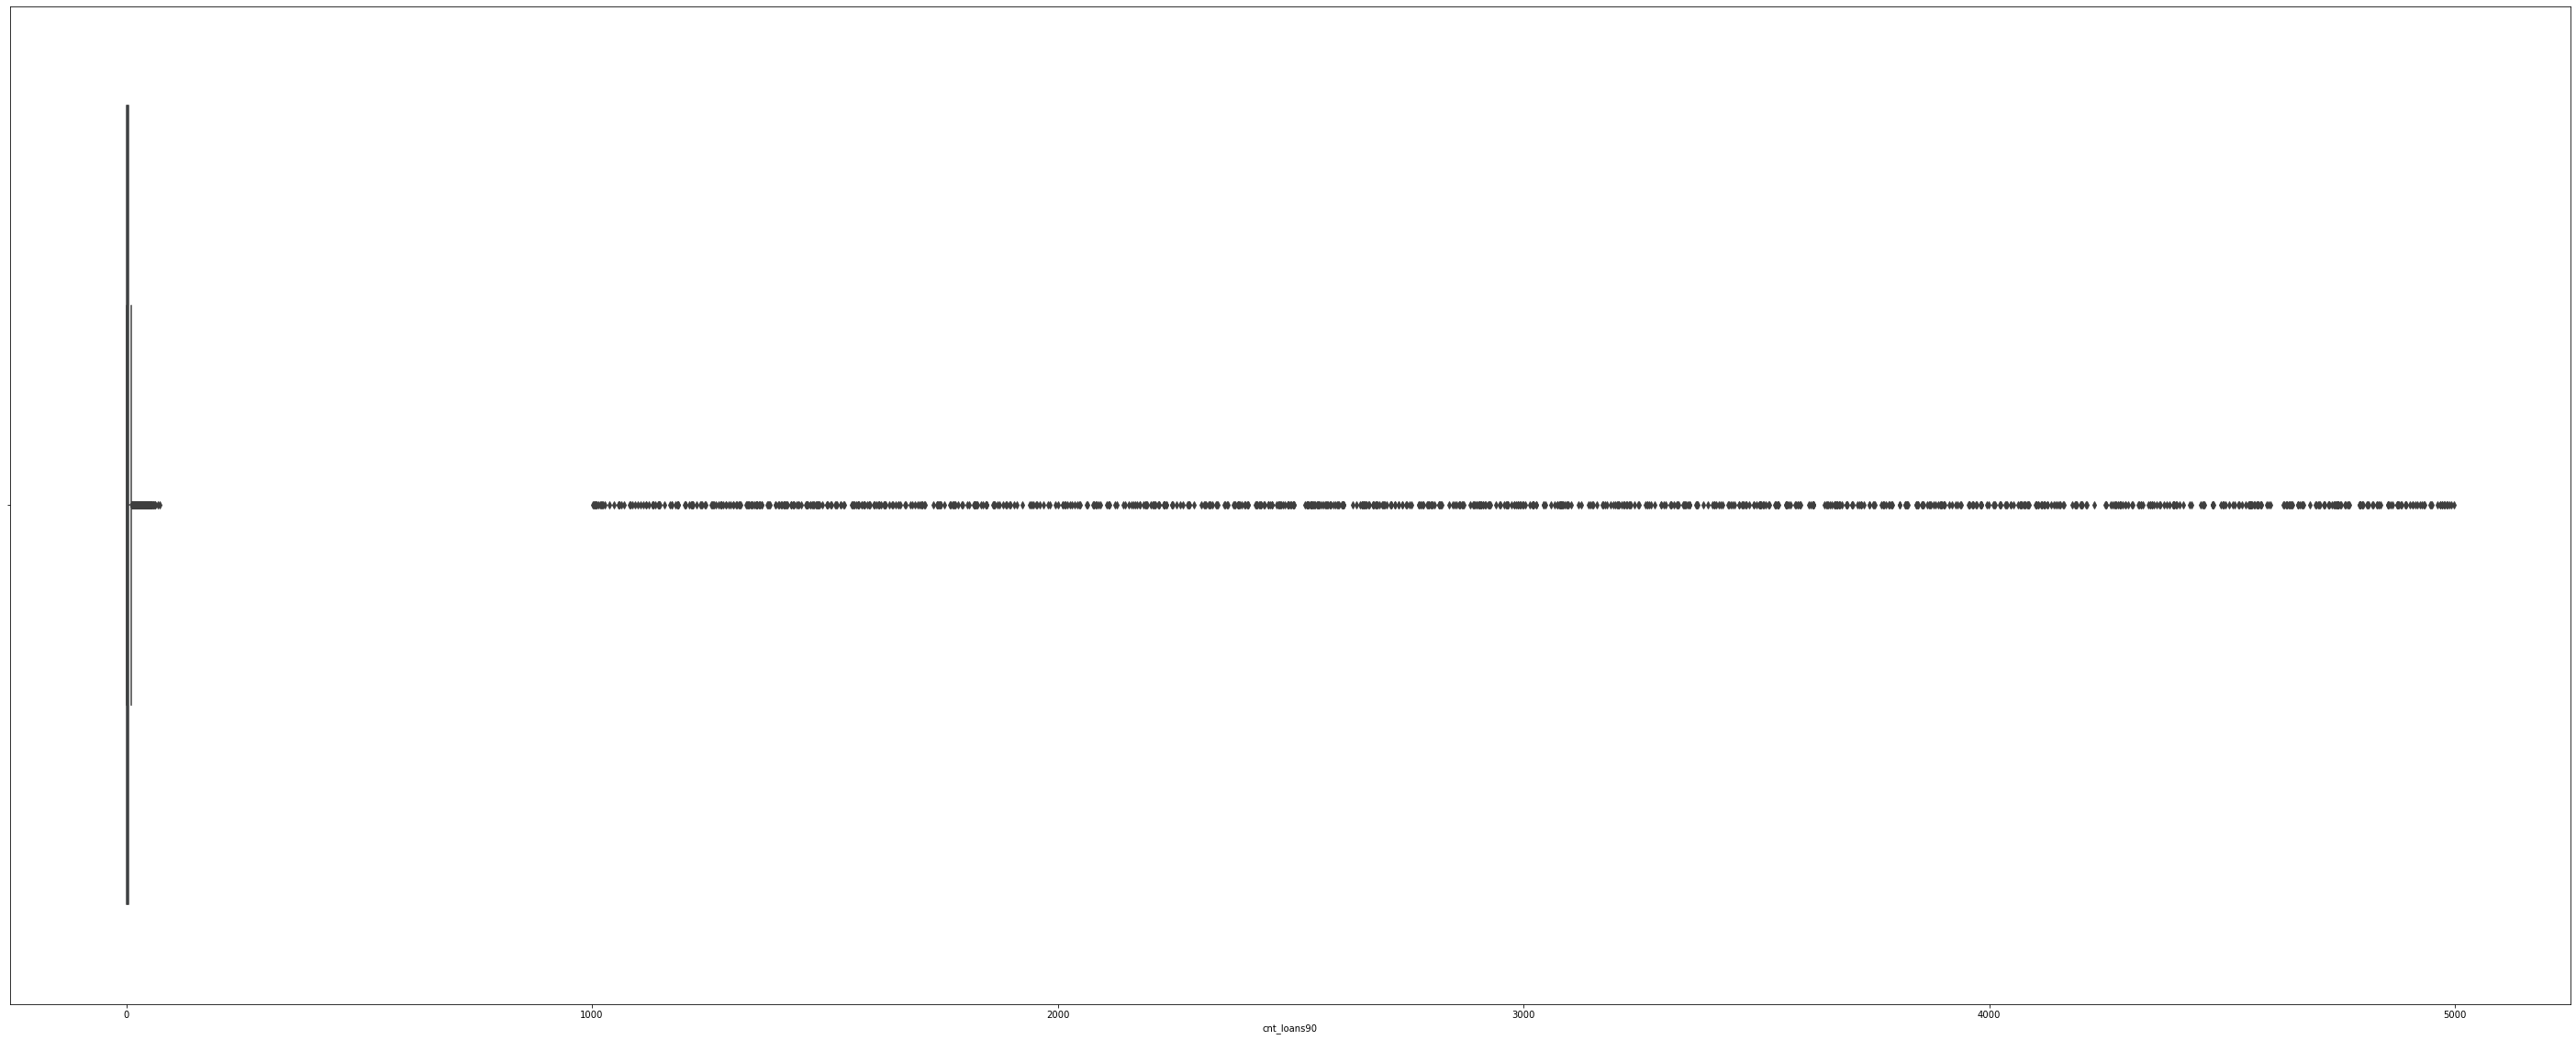

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(50,20)
sns.boxplot(x='cnt_loans90',hue='payback90',data=df)

In [15]:
df[df['cnt_loans30']>25]['payback30'].value_counts()


1.500000    5
1.750000    3
1.551724    2
1.461538    2
1.560000    2
           ..
1.592593    1
1.320000    1
1.680000    1
1.466667    1
1.437500    1
Name: payback30, Length: 64, dtype: int64

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

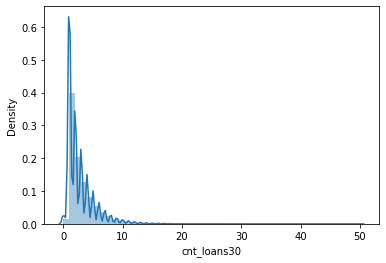

In [16]:
sns.distplot(df['cnt_loans30'])


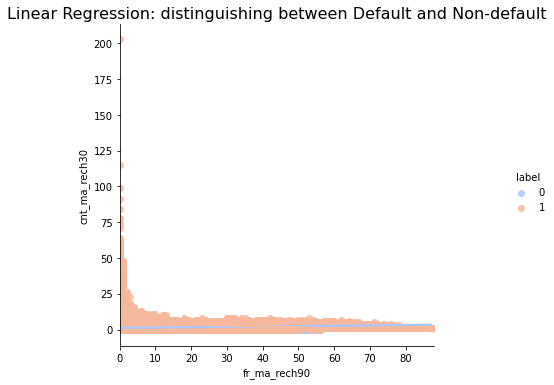

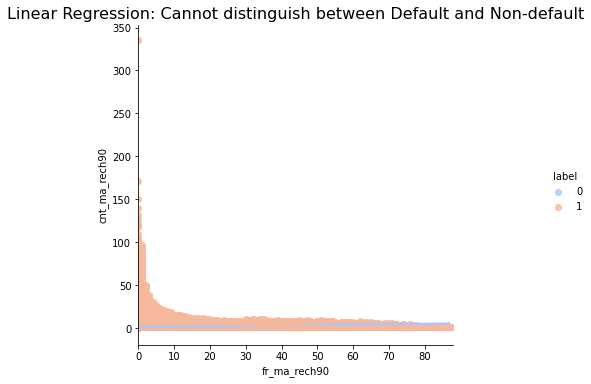

In [17]:
sns.lmplot(x='fr_ma_rech90', y= 'cnt_ma_rech30', data = df, hue ='label', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='fr_ma_rech90', y= 'cnt_ma_rech90', data = df, hue ='label', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);


## Machine Learning: Classification models


The classification models used for this analysis are: Logistic Regression, Decision Tree and Random Forest Classifier,  Naive Bayes Classification and 
KNN Classification.
 
To build machine learning models the original data was divided into features (X) and target (y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

### Spliting the data into train and test sets


In [18]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X = df.drop('label', axis=1)  
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# Separating features and target
y = df.label     # target default=1 or non-default=0
features = df.drop('label', axis = 1, inplace = False)

In [20]:
stdX = (features - features.mean()) / (features.std())              # standardization
# Dataset with standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                                random_state=42)

### Feature Selection

#### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.



In [21]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression

In [22]:
from sklearn.feature_selection import RFE

In [23]:
Ximp = stdX[['fr_ma_rech90', 'cnt_ma_rech30', 'cnt_ma_rech90']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)

### Logistic Regression (original data)

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

The parameter ‘C’ was tuned using RandomizedSearchCV( ) for the different datasets: original, standardized and with most important features. Once the parameter ‘C’ was defined for each dataset, the logistic regression model initiated and then fitted to the training data, as it was described in the methodology.

In [24]:
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.

In [25]:
df.drop(df.columns[[2, 35, 36]], axis = 1, inplace = True)

In [26]:
X=df.drop(['label'], axis=1)
Y=df['label']

In [27]:
from sklearn import metrics

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

Accuracy: 0.8766221374045802


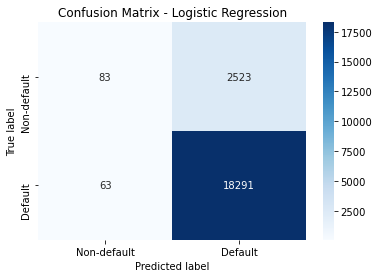

In [30]:
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,Y_test))

ConfMatrix = confusion_matrix(Y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test,Y_test)*100,2)))

Test Accuracy: 87.66%


#### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix

In [33]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)

In [34]:
print("Decision Tree Classifier Report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier Report 
               precision    recall  f1-score   support

           0       0.57      0.03      0.06      2606
           1       0.88      1.00      0.93     18354

    accuracy                           0.88     20960
   macro avg       0.72      0.51      0.50     20960
weighted avg       0.84      0.88      0.83     20960



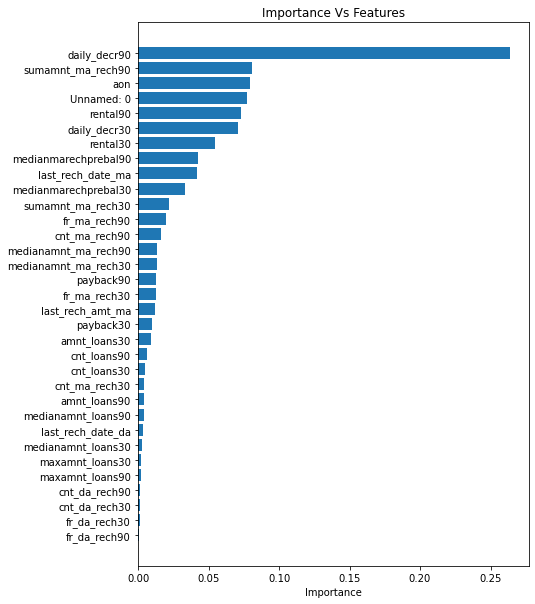

In [35]:
features = X.columns.values
Importance = dt.feature_importances_
sorted_index = np.argsort(Importance)

plt.figure(figsize=(7,10))
plt.barh(range(len(sorted_index)), Importance[sorted_index], align='center')
plt.yticks(range(len(sorted_index)), features[sorted_index])
plt.xlabel('Importance')
plt.title('Importance Vs Features')
plt.draw()
plt.show()

In [36]:
y_pred=dt.predict(X_test)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 86.66%


#### Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test,Y_test)*100,2)))

Test Accuracy: 91.45%


#### Naive Bayes Classification 

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test,Y_test)*100,2)))

Test Accuracy: 54.34%


### Comparison of model performance


The metrics used to evaluate performance of the different models: accuracy, precision, recall, f1-score, AUC (ROC), and confusion matrix were employed.

#### Cross Validation Scores

Accuracy is the ratio of correctly predicted observation to the overall observations and it is one of the most intuitive measurements of performance. However, a high accuracy rate does not always mean we have a perfect model. In fact, it only works well when the datasets are symmetric. It can be misleading when classes are imbalanced.

Using K-fold cross-validation it is possible to obtain less biased models and avoid overfitting the data. In this case it was used a 5-fold cross-validation, as shown in the code below.

cv_scores = cross_val_score(Model, X, y, cv=5)

After cross-validation there are five values of accuracy, so it was calculated the mean and standard deviation of all results.

In [40]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,X,Y,cv=5)
print("Cross Validation Score of Logistic Regression Model:", scr.mean())

Cross Validation Score of Logistic Regression Model: 0.876131350658832


In [41]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,X,Y,cv=5)
print("Cross Validation Score of Decision Tree Model:", scr.mean())

Cross Validation Score of Decision Tree Model: 0.7667857225998578


In [42]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,X,Y,cv=5)
print("Cross Validation Score of Random Forest Model:", scr.mean())

Cross Validation Score of Random Forest Model: 0.9103357110134954


In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(nb,X,Y,cv=5)
print("Cross Validation Score of Naive Bayes Classifcation Model:", scr.mean())

Cross Validation Score of Naive Bayes Classifcation Model: 0.5476137268273733


Best Model should have minimum difference between Accuracy and Cross Validation Score. So the best model here is Random  Forest Model.

#### Receiver operating characteristic (ROC) Curve


Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The AUC is the Area Under Curve. If the AUC is high, the model is better distinguishing between positive and negative class. The ROC curve is plotted with “True Positive Rate” or Recall (on the y-axis) against the “False Positive Rate” (on the x-axis). When the AUC is 0.5 means that the model has no discrimination capacity to distinguish between positive and negative class.

The Receiver operating characteristic (ROC) Curve with the respective area under the curve (AUC) are shown below for each model.

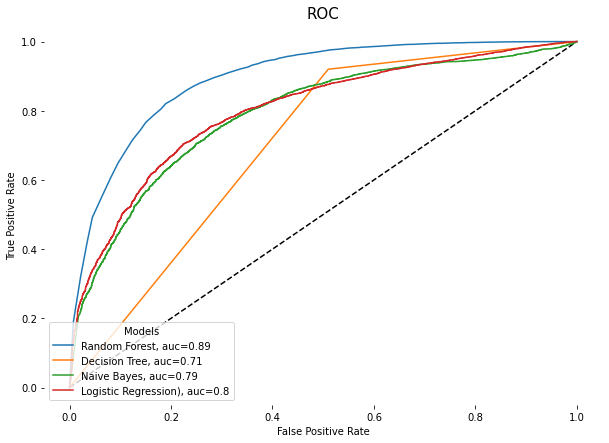

In [44]:
y_pred_proba_RF = rf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(Y_test, y_pred_proba_RF)

y_pred_proba_DT = dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(Y_test, y_pred_proba_DT)

y_pred_proba_NB = nb.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  y_pred_proba_NB)
auc3 = metrics.roc_auc_score(Y_test, y_pred_proba_NB)

y_pred_proba_LR = lr.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(Y_test,  y_pred_proba_LR)
auc4 = metrics.roc_auc_score(Y_test, y_pred_proba_LR)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Naive Bayes, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Logistic Regression), auc="+str(round(auc4,2)))
plt.legend(loc=3, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

#### Hyper Parameter Tuning

Accuracy: 0.9014790076335878

              precision    recall  f1-score   support

           0       0.89      0.24      0.37      2606
           1       0.90      1.00      0.95     18354

    accuracy                           0.90     20960
   macro avg       0.90      0.62      0.66     20960
weighted avg       0.90      0.90      0.88     20960


Average 5-Fold CV Score: 0.9019 , Standard deviation: 0.0004


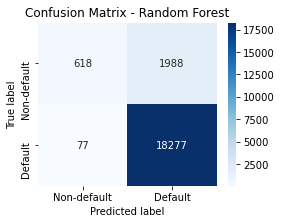

In [45]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_pred,Y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(rf, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(Y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,rf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");